In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/supermarket_sales%20-%20Sheet1.csv')
df.head(11)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [32]:
df_revenue_by_gender = df.groupby('Gender').agg([np.median, sum])
df_revenue_by_gender.T

Gender                                 Female           Male
Unit price              median      54.070000      56.500000
                        sum      27687.240000   27984.890000
Quantity                median       6.000000       5.000000
                        sum       2869.000000    2641.000000
Tax 5%                  median      12.980000      11.630000
                        sum       7994.425000    7384.944000
Total                   median     272.580000     244.230000
                        sum     167882.925000  155083.824000
cogs                    median     259.600000     232.600000
                        sum     159888.500000  147698.880000
gross margin percentage median       4.761905       4.761905
                        sum       2385.714286    2376.190476
gross income            median      12.980000      11.630000
                        sum       7994.425000    7384.944000
Rating                  median       7.100000       6.900000
                        sum       3489.200000    3483.500000

In [33]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## regression 


In [34]:
df.shape
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [35]:
df = df.drop(['Invoice ID', 'Date', 'Time','Branch'], axis = 1)

In [36]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [37]:
df.isnull().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [38]:
df.dtypes

City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [39]:
df1 = [df[["Unit price", "Quantity", "Total", "gross margin percentage","Rating"]], 
           pd.get_dummies(df[["City", "Customer type", "Gender","Product line","Payment"]], drop_first=True), 
           df[["gross income"]]]

In [40]:
df1

[     Unit price  Quantity      Total  gross margin percentage  Rating
 0         74.69         7   548.9715                 4.761905     9.1
 1         15.28         5    80.2200                 4.761905     9.6
 2         46.33         7   340.5255                 4.761905     7.4
 3         58.22         8   489.0480                 4.761905     8.4
 4         86.31         7   634.3785                 4.761905     5.3
 ..          ...       ...        ...                      ...     ...
 995       40.35         1    42.3675                 4.761905     6.2
 996       97.38        10  1022.4900                 4.761905     4.4
 997       31.84         1    33.4320                 4.761905     7.7
 998       65.82         1    69.1110                 4.761905     4.1
 999       88.34         7   649.2990                 4.761905     6.6
 
 [1000 rows x 5 columns],
      City_Naypyitaw  City_Yangon  Customer type_Normal  Gender_Male  \
 0                 0            1               

In [41]:
X = pd.concat(df1, axis=1)

In [42]:
X

,Unit price,Quantity,Total,gross margin percentage,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,gross income
0,74.69,7,548.9715,4.761905,9.1,0,1,0,0,0,0,1,0,0,0,1,26.1415
1,15.28,5,80.2200,4.761905,9.6,1,0,1,0,0,0,0,0,0,0,0,3.8200
2,46.33,7,340.5255,4.761905,7.4,0,1,1,1,0,0,0,1,0,1,0,16.2155
3,58.22,8,489.0480,4.761905,8.4,0,1,0,1,0,0,1,0,0,0,1,23.2880
4,86.31,7,634.3785,4.761905,5.3,0,1,1,1,0,0,0,0,1,0,1,30.2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,42.3675,4.761905,6.2,1,0,1,1,0,0,1,0,0,0,1,2.0175
996,97.38,10,1022.4900,4.761905,4.4,0,0,1,0,0,0,0,1,0,0,1,48.6900
997,31.84,1,33.4320,4.761905,7.7,0,1,0,1,0,1,0,0,0,0,0,1.5920
998,65.82,1,69.1110,4.761905,4.1,0,1,1,1,0,0,0,1,0,0,0,3.2910


In [43]:
y = df[["gross income"]]

In [44]:
y

,gross income
0,26.1415
1,3.8200
2,16.2155
3,23.2880
4,30.2085
...,...
995,2.0175
996,48.6900
997,1.5920
998,3.2910


In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [46]:
linreg.fit(X,y)

LinearRegression()

In [47]:
np.round(linreg.coef_.ravel(), 4)

array([ 0.    ,  0.    ,  0.0475, -0.    , -0.    , -0.    , -0.    ,
       -0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.    ,  0.    ,
        0.    ,  0.    ,  0.0023])

In [48]:
linreg.intercept_

array([-1.77635684e-14])

In [49]:
y_pred = linreg.predict(X)
y_pred[:5]

array([[26.1415],
       [ 3.82  ],
       [16.2155],
       [23.288 ],
       [30.2085]])

In [50]:
y[:5]

,gross income
0,26.1415
1,3.8200
2,16.2155
3,23.2880
4,30.2085


Text(0.5, 0, ' gross income')

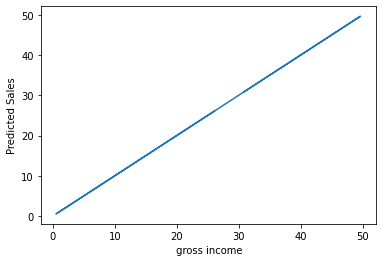

In [73]:

plt.plot(y,y_pred)
plt.ylabel('Predicted Sales')
plt.xlabel(' gross income')

In [74]:

x_all = sm.add_constant(X)
x_all.head()

,Unit price,Quantity,Total,gross margin percentage,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,gross income
0,74.69,7,548.9715,4.761905,9.1,0,1,0,0,0,0,1,0,0,0,1,26.1415
1,15.28,5,80.2200,4.761905,9.6,1,0,1,0,0,0,0,0,0,0,0,3.8200
2,46.33,7,340.5255,4.761905,7.4,0,1,1,1,0,0,0,1,0,1,0,16.2155
3,58.22,8,489.0480,4.761905,8.4,0,1,0,1,0,0,1,0,0,0,1,23.2880
4,86.31,7,634.3785,4.761905,5.3,0,1,1,1,0,0,0,0,1,0,1,30.2085


In [24]:
est_all = sm.OLS(y, x_all)

In [25]:
est_a = est_all.fit()

In [26]:
est_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.166e+32
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:43:02   Log-Likelihood:                 30948.
No. Observations:                1000   AIC:                        -6.186e+04
Df Residuals:                     984   BIC:                        -6.178e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Unit price                        -3.73e-17   2.27e-17     -1.643      0.101   -8.19e-17    7.26e-18
Quantity                         -5.551e-17   2.24e-16     -0.247      0.805   -4.96e-16    3.85e-16
Total                                0.0475   3.44e-18   1.38e+16      0.000       0.048       0.048
gross margin percentage          -2.498e-16   4.18e-16     -0.597      0.551   -1.07e-15    5.71e-16
Rating                           -5.551e-17   1.64e-16     -0.339      0.735   -3.77e-16    2.66e-16
City_Naypyitaw                   -4.441e-16   6.94e-16     -0.640      0.522   -1.81e-15    9.17e-16
City_Yangon                       1.776e-15   6.85e-16      2.592      0.010    4.31e-16    3.12e-15
Customer type_Normal              6.661e-16   5.63e-16      1.183      0.237   -4.38e-16    1.77e-15
Gender_Male                       1.943e-15   5.65e-16      3.437      0.001    8.34e-16    3.05e-15
Product line_Fashion accessories  7.772e-16   9.55e-16      0.814      0.416    -1.1e-15    2.65e-15
Product line_Food and beverages  -6.661e-16   9.59e-16     -0.695      0.487   -2.55e-15    1.22e-15
Product line_Health and beauty    -1.11e-16   9.91e-16     -0.112      0.911   -2.06e-15    1.83e-15
Product line_Home and lifestyle   4.163e-16   9.79e-16      0.425      0.671    -1.5e-15    2.34e-15
Product line_Sports and travel   -1.443e-15   9.69e-16     -1.490      0.137   -3.34e-15    4.58e-16
Payment_Credit card               -1.11e-15   6.97e-16     -1.593      0.112   -2.48e-15    2.58e-16
Payment_Ewallet                   -1.11e-16   6.78e-16     -0.164      0.870   -1.44e-15    1.22e-15
gross income                         0.0023   1.64e-19   1.38e+16      0.000       0.002       0.002
==============================================================================
Omnibus:                      162.704   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.688
Skew:                           1.060   Prob(JB):                     9.08e-58
Kurtosis:                       4.345   Cond. No.                     1.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
df2=df[['Unit price', 'Quantity', 'Total', 'gross margin percentage',
       'Rating', 'Gender', 'gross income', 'Customer type']]

In [60]:
df2

,Unit price,Quantity,Total,gross margin percentage,Rating,Gender,gross income,Customer type
0,74.69,7,548.9715,4.761905,9.1,Female,26.1415,Member
1,15.28,5,80.2200,4.761905,9.6,Female,3.8200,Normal
2,46.33,7,340.5255,4.761905,7.4,Male,16.2155,Normal
3,58.22,8,489.0480,4.761905,8.4,Male,23.2880,Member
4,86.31,7,634.3785,4.761905,5.3,Male,30.2085,Normal
...,...,...,...,...,...,...,...,...
995,40.35,1,42.3675,4.761905,6.2,Male,2.0175,Normal
996,97.38,10,1022.4900,4.761905,4.4,Female,48.6900,Normal
997,31.84,1,33.4320,4.761905,7.7,Male,1.5920,Member
998,65.82,1,69.1110,4.761905,4.1,Male,3.2910,Normal


In [61]:
df2["gross income"].mean()

15.379368999999999

# T test

In [80]:
Z=df[["Rating"]]

In [81]:
data = Z

In [82]:
data


,Rating
0,9.1
1,9.6
2,7.4
3,8.4
4,5.3
...,...
995,6.2
996,4.4
997,7.7
998,4.1


In [83]:
import numpy as np
data_mean=np.mean(data)
print(data_mean)

Rating    6.9727
dtype: float64


In [84]:
len(data)

1000

In [85]:
sample_size=600
data_sample=np.random.choice(data['Rating'],sample_size)
data_sample

array([ 7.4,  5.7,  8. ,  9.8,  5.6,  6.7,  6.8,  9.8,  6.6,  5. ,  7.9,
        6.2,  8.1,  4.8,  4.4,  6.6,  8.5,  9.3,  6.2,  9.5,  8.3,  9.8,
        8. ,  6.9,  4.6,  9. ,  8.4,  8. ,  5.4,  7.6,  4.1,  6.6,  6.2,
        6.5,  5.1,  9.5,  8.7,  6.5,  9.1,  9.5,  6.7,  4.4,  9.4,  7.7,
        8. ,  7.1,  4.3,  7.8,  5. ,  7.1,  9.8,  4.8,  6. ,  7. ,  9.3,
        4.1,  8. ,  7.8,  6.9, 10. ,  9.8,  9. ,  4.2,  7.9,  4.2,  6.2,
        6.2,  9. ,  5.3,  5.9,  4.8,  9.1,  8.8,  9.1,  7.7,  6.6,  9.5,
        7.1,  7. ,  6.4,  8.4,  9. ,  8.3,  5.1,  7.7,  5.6,  6. ,  6. ,
        8.3,  5.7,  4.9,  4.1,  8.6,  5.9,  8.2,  9.2,  7.9,  6.9,  5. ,
        8.8,  7.1,  8. ,  5.5,  7.7,  6.3,  6.1,  5.4,  8. ,  7.6,  5.8,
        5.9,  5.3,  9.5,  8.6,  4.3,  4.2,  8.8,  8.1,  6.5,  6.7,  4. ,
        9.5,  4.5,  6.3,  7.8,  9.8,  8.4,  6. ,  8.4,  9.9,  7. ,  5.1,
        9.6,  6.7,  8.2,  8.9,  7.3,  5.6,  9.3,  5.7,  6. ,  6.6,  4.5,
        5.3,  9.3,  6.4,  6.6,  9.9,  4.2,  8. ,  9

In [86]:
from scipy.stats import ttest_1samp

In [87]:
ttest,p_value=ttest_1samp(data_sample,6.9727)

In [88]:
print(p_value)

0.41891679978331275


In [89]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# hypothesis testing 

In [90]:
df3=df[['Customer type','Rating']]

In [91]:
df3

,Customer type,Rating
0,Member,9.1
1,Normal,9.6
2,Normal,7.4
3,Member,8.4
4,Normal,5.3
...,...,...
995,Normal,6.2
996,Normal,4.4
997,Member,7.7
998,Normal,4.1


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<AxesSubplot:title={'center':'Member'}>,
       <AxesSubplot:title={'center':'Normal'}>], dtype=object)

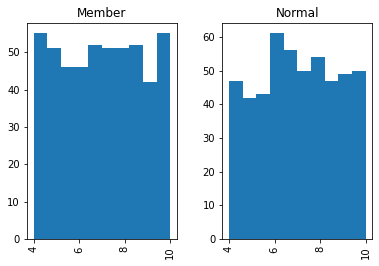

In [93]:
df3.hist(by ='Customer type')

In [95]:
meantable = df3.groupby('Customer type').mean()
type(meantable)

pandas.core.frame.DataFrame

In [96]:
meantable

,Rating
Customer type,
Member,6.940319
Normal,7.005210


In [97]:
observed_difference = meantable['Rating'][1] - meantable['Rating'][0]
observed_difference

0.06489105956423735

In [105]:
shuffle= df3.sample(1000,replace = False)
shuffle

,Customer type,Rating
538,Normal,4.9
40,Member,7.9
343,Normal,9.3
273,Normal,5.1
800,Normal,7.9
...,...,...
6,Member,5.8
972,Normal,5.5
839,Member,5.0
494,Normal,7.1


In [106]:
shuffle_rt = shuffle['Rating']
type(shuffle_rt)

pandas.core.series.Series

In [107]:
shuffle_rt

538    4.9
40     7.9
343    9.3
273    5.1
800    7.9
      ... 
6      5.8
972    5.5
839    5.0
494    7.1
294    5.9
Name: Rating, Length: 1000, dtype: float64

In [108]:
original_and_shuffled= df3.assign(shuffle_rt=shuffle_rt.values)

In [109]:
original_and_shuffled

,Customer type,Rating,shuffle_rt
0,Member,9.1,4.9
1,Normal,9.6,7.9
2,Normal,7.4,9.3
3,Member,8.4,5.1
4,Normal,5.3,7.9
...,...,...,...
995,Normal,6.2,5.8
996,Normal,4.4,5.5
997,Member,7.7,5.0
998,Normal,4.1,7.1


In [110]:
all_group_means= original_and_shuffled.groupby('Customer type').mean()
all_group_means

,Rating,shuffle_rt
Customer type,,
Member,6.940319,6.987625
Normal,7.005210,6.957715


In [111]:
difference = all_group_means['shuffle_rt'][0]- all_group_means['shuffle_rt'][1]
difference

0.029909319637284604

In [112]:
differences = np.zeros(5000)

In [114]:
for i in np.arange(5000):
    df3 = df[['Customer type','Rating']]
    shuffle = df3.sample(1000,replace = False)
    shuffle_rt = shuffle['Rating']
    original_and_shuffled= df3.assign(shuffle_rt=shuffle_rt.values)
    all_group_means= original_and_shuffled.groupby('Customer type').mean()
    difference = all_group_means['shuffle_rt'][0]- all_group_means['shuffle_rt'][1]
    differences[i] = difference

In [115]:
import array

In [116]:
differences

array([ 0.06070944, -0.0752911 , -0.06569106, ...,  0.09750959,
       -0.05969104,  0.0251093 ])

In [117]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [118]:
diff= pd.DataFrame(differences)

In [119]:
diff

,0
0,0.060709
1,-0.075291
2,-0.065691
3,-0.104091
4,-0.066491
...,...
4995,-0.020491
4996,0.059509
4997,0.097510
4998,-0.059691


In [120]:
empirical_P=np.count_nonzero(differences <= observed_difference)/differences.size
empirical_P

0.7294

Observed Difference: 0.06489105956423735
Empirical P-value: 0.7294


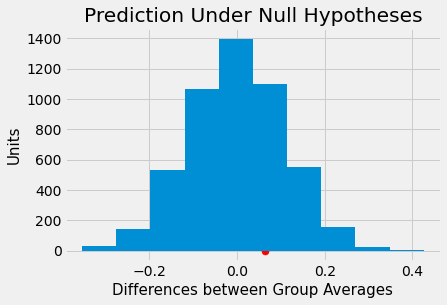

In [122]:
plt.style.use('fivethirtyeight')
diff.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, -1, color='red', s=50)
print('Observed Difference:', observed_difference)
print('Empirical P-value:', empirical_P)

### observed differents is 0.0648910 and the emperical p value :0.7294 the distribution is centered around 0.0,This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.thus we can accept the null hypothesis from the observation graph

# classification and roc on new dataset 

In [2]:
#titanic data set 
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/train%20(1).csv')
data.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
columns_to_drop=[ 'Name','Ticket','Cabin', 'Embarked']

In [7]:
data_clean=data.drop(columns=columns_to_drop)

In [8]:
data_clean


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
data_clean['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [12]:

le.fit_transform(data_clean['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [13]:
data_clean['Sex']=le.fit_transform(data_clean['Sex'])

In [14]:
data_clean

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [16]:
data_clean["Fare"].median()

14.4542

In [17]:
data_clean["Age"].median()

28.0

In [18]:
data_clean["Fare"].median()

14.4542

In [19]:
data_clean["Age"]=data_clean["Age"].fillna(value=data_clean["Age"].median())

In [20]:
data_clean["Fare"]=data_clean["Fare"].fillna(value=data_clean["Fare"].median())

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [22]:
data_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [23]:
input_cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [24]:
output_cols=['Survived']

In [25]:
X=data_clean[input_cols]


In [26]:
y=data_clean[output_cols]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  18]
 [ 36  64]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.78      0.64      0.70       100

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [40]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

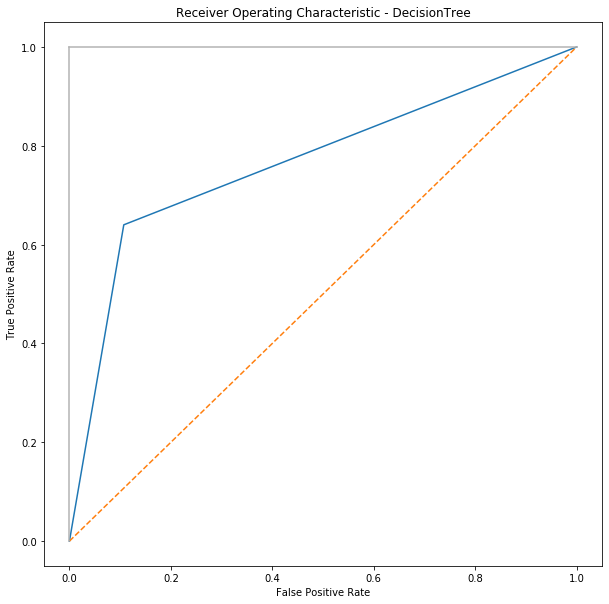

In [42]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
data1=pd.read_csv("https://raw.githubusercontent.com/Gopikrishnan96/master/main/test%20(2).csv")

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
columns_to_drop=[ 'Name','Ticket','Cabin', 'Embarked']

In [35]:
data_clean1=data1.drop(columns=columns_to_drop)

In [36]:
data_clean1['Sex']=le.fit_transform(data_clean1['Sex'])

In [37]:
data_clean1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500
414,1306,1,0,39.0,0,0,108.9000
415,1307,3,1,38.5,0,0,7.2500
416,1308,3,1,NaN,0,0,8.0500


In [38]:
data_clean1["Age"]=data_clean1["Age"].fillna(value=data_clean1["Age"].median())

In [39]:
data_clean1["Fare"]=data_clean1["Fare"].fillna(value=data_clean1["Fare"].median())

In [41]:
input_cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [42]:
X1=data_clean1[input_cols]

In [43]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [44]:
df=pd.DataFrame({'PassengerId':[a for a in range(892,1310)],"Survived":model.predict(X1)})

In [45]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
